# Trabajo N°2 Web scraping - spaCy

El siguiente trabajo consiste en utilizar la libreria de spaCy para procesar un texto extraido de la web con web scraping, con la finalidad de realizar:



*   Tokenizacion
*   Reconocimiento de entidades
*   Análisis de dependencias sintactica
*   Graficar una nube de palabras




## 1 - Web Scraping

Utilizamos Beautiful Soup para extraer un fragmento del cuento "El gato con botas" que se encuentra en la pagina.

In [ ]:
# Importamos Librerias
import requests
from bs4 import BeautifulSoup

In [ ]:
# Guardamos en una variable la url
url = "https://www.cuentosinfantiles.net/cuentos-el-gato-con-botas/"

In [ ]:
# Guardamos el contenido de la url en una variable
contenido = requests.get(url).text

In [ ]:
# Parseamos el contenio con BeautifulSoup
soup = BeautifulSoup(contenido, "html.parser")

In [ ]:
# Buscamos la etiqueta correspondiente al titulo y lo mostramos
titulo = soup.find("h1").get_text()
print(f"Titulo del cuento: '{titulo}'\n")

# Creamos una variable con todos los parrafos que se encuentra en la pagina y lo mostramos
texto = "\n".join([p.get_text() for p in soup.find_all("p")] )
print(texto)

Titulo del cuento: 'El gato con botas'

Había una vez un molinero cuya única herencia para sus tres hijos eran su molino, su asno y su gato. Pronto se hizo la repartición sin necesitar de un clérigo ni de un abogado, pues ya habían consumido todo el pobre patrimonio. Al mayor le tocóel molino, al segundo el asno, y al menor el gato que quedaba. 
El pobre joven amigo estaba bien inconforme por haber recibido tan poquito.
-”Mis hermanos”- dijo él,-”pueden hacer una bonita vida juntando sus bienes, pero por mi parte, después de haberme comido al gato, y hacer unas sandalias con su piel, entonces no me quedará más que morir de hambre.”-
El gato, que oyó todo eso, pero no lo tomaba así, le dijo en un tono firme y serio:
-”No te preocupes tanto, mi buen amo. Si me das un bolso, y me tienes un par de botas para mí, con las que yo pueda atravesar lodos y zarzales, entonces verás que no eres tan pobre conmigo como te lo imaginas.”-
El amo del gato no le dió mucha posibilidad a lo que le decía. 

In [ ]:
# Recortamos una parte del texto
palabra_objetivo = "ahogando!”-"
palabras = texto.split()
texto_extraido = " ".join(palabras[:palabras.index(palabra_objetivo) + 1])
print(texto_extraido)

Había una vez un molinero cuya única herencia para sus tres hijos eran su molino, su asno y su gato. Pronto se hizo la repartición sin necesitar de un clérigo ni de un abogado, pues ya habían consumido todo el pobre patrimonio. Al mayor le tocóel molino, al segundo el asno, y al menor el gato que quedaba. El pobre joven amigo estaba bien inconforme por haber recibido tan poquito. -”Mis hermanos”- dijo él,-”pueden hacer una bonita vida juntando sus bienes, pero por mi parte, después de haberme comido al gato, y hacer unas sandalias con su piel, entonces no me quedará más que morir de hambre.”- El gato, que oyó todo eso, pero no lo tomaba así, le dijo en un tono firme y serio: -”No te preocupes tanto, mi buen amo. Si me das un bolso, y me tienes un par de botas para mí, con las que yo pueda atravesar lodos y zarzales, entonces verás que no eres tan pobre conmigo como te lo imaginas.”- El amo del gato no le dió mucha posibilidad a lo que le decía. Sin embargo, a menudo lo había visto haci

In [ ]:
# Limpiamos el texto extraido de simbolos
texto_pequeño = texto_extraido.replace("”", "").replace("-", "").replace("“", "").replace("!", " ").replace("¡", " ")
print(texto_pequeño)

Había una vez un molinero cuya única herencia para sus tres hijos eran su molino, su asno y su gato. Pronto se hizo la repartición sin necesitar de un clérigo ni de un abogado, pues ya habían consumido todo el pobre patrimonio. Al mayor le tocóel molino, al segundo el asno, y al menor el gato que quedaba. El pobre joven amigo estaba bien inconforme por haber recibido tan poquito. Mis hermanos dijo él,pueden hacer una bonita vida juntando sus bienes, pero por mi parte, después de haberme comido al gato, y hacer unas sandalias con su piel, entonces no me quedará más que morir de hambre. El gato, que oyó todo eso, pero no lo tomaba así, le dijo en un tono firme y serio: No te preocupes tanto, mi buen amo. Si me das un bolso, y me tienes un par de botas para mí, con las que yo pueda atravesar lodos y zarzales, entonces verás que no eres tan pobre conmigo como te lo imaginas. El amo del gato no le dió mucha posibilidad a lo que le decía. Sin embargo, a menudo lo había visto haciendo ingenio

## 2 - Análisis de dependencia sintactica con spaCy

La dependencia sintáctica es una relación entre dos elementos lingüísticos en la cual uno de ellos está subordinado, regido o exigido por el otro.

In [ ]:
# Descargamos un modelo de lenguaje pre-entrenado en español de la biblioteca spaCy
!python -m spacy download es_core_news_lg -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 2.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# Importamos Librerias
import spacy
import es_core_news_lg
from spacy import displacy

In [ ]:
# Pipeline de Spacy: Cargamos el modelo
nlp = spacy.load("es_core_news_lg")
nlp = es_core_news_lg.load()

In [ ]:
# Procesar el texto con Spacy
texto_recortado = nlp(texto_pequeño)

In [ ]:
# Tokenizacion
tokens = [token.text for token in texto_recortado]
print(tokens)

['Había', 'una', 'vez', 'un', 'molinero', 'cuya', 'única', 'herencia', 'para', 'sus', 'tres', 'hijos', 'eran', 'su', 'molino', ',', 'su', 'asno', 'y', 'su', 'gato', '.', 'Pronto', 'se', 'hizo', 'la', 'repartición', 'sin', 'necesitar', 'de', 'un', 'clérigo', 'ni', 'de', 'un', 'abogado', ',', 'pues', 'ya', 'habían', 'consumido', 'todo', 'el', 'pobre', 'patrimonio', '.', 'Al', 'mayor', 'le', 'tocóel', 'molino', ',', 'al', 'segundo', 'el', 'asno', ',', 'y', 'al', 'menor', 'el', 'gato', 'que', 'quedaba', '.', 'El', 'pobre', 'joven', 'amigo', 'estaba', 'bien', 'inconforme', 'por', 'haber', 'recibido', 'tan', 'poquito', '.', 'Mis', 'hermanos', 'dijo', 'él', ',', 'pueden', 'hacer', 'una', 'bonita', 'vida', 'juntando', 'sus', 'bienes', ',', 'pero', 'por', 'mi', 'parte', ',', 'después', 'de', 'haberme', 'comido', 'al', 'gato', ',', 'y', 'hacer', 'unas', 'sandalias', 'con', 'su', 'piel', ',', 'entonces', 'no', 'me', 'quedará', 'más', 'que', 'morir', 'de', 'hambre', '.', 'El', 'gato', ',', 'que', 

In [ ]:
# Lematizacion: forma base de cada token
for token in texto_recortado:
    if not token.is_punct and not token.is_space: # Ignoramos puntuación y espacios
        print(f"'{token.text}' ===> '{token.lemma_}'")

'Había' ===> 'haber'
'una' ===> 'uno'
'vez' ===> 'vez'
'un' ===> 'uno'
'molinero' ===> 'molinero'
'cuya' ===> 'cuyo'
'única' ===> 'único'
'herencia' ===> 'herencia'
'para' ===> 'para'
'sus' ===> 'su'
'tres' ===> 'tres'
'hijos' ===> 'hijo'
'eran' ===> 'ser'
'su' ===> 'su'
'molino' ===> 'molino'
'su' ===> 'su'
'asno' ===> 'asno'
'y' ===> 'y'
'su' ===> 'su'
'gato' ===> 'gato'
'Pronto' ===> 'pronto'
'se' ===> 'él'
'hizo' ===> 'hacer'
'la' ===> 'el'
'repartición' ===> 'repartición'
'sin' ===> 'sin'
'necesitar' ===> 'necesitar'
'de' ===> 'de'
'un' ===> 'uno'
'clérigo' ===> 'clérigo'
'ni' ===> 'ni'
'de' ===> 'de'
'un' ===> 'uno'
'abogado' ===> 'abogado'
'pues' ===> 'pues'
'ya' ===> 'ya'
'habían' ===> 'haber'
'consumido' ===> 'consumir'
'todo' ===> 'todo'
'el' ===> 'el'
'pobre' ===> 'pobre'
'patrimonio' ===> 'patrimonio'
'Al' ===> 'al'
'mayor' ===> 'mayor'
'le' ===> 'él'
'tocóel' ===> 'tocóel'
'molino' ===> 'molino'
'al' ===> 'al'
'segundo' ===> 'segundo'
'el' ===> 'el'
'asno' ===> 'asno'
'y' 

In [ ]:
# Realizamos Etiquetado gramatical
for token in texto_recortado:
    if not token.is_space: # Ignoramos espacios
        print(f"'{token.text}' ===> {token.pos_} ({spacy.explain(token.pos_)}) ===> {token.tag_}")

'Había' ===> AUX (auxiliary) ===> AUX
'una' ===> DET (determiner) ===> DET
'vez' ===> NOUN (noun) ===> NOUN
'un' ===> DET (determiner) ===> DET
'molinero' ===> NOUN (noun) ===> NOUN
'cuya' ===> PRON (pronoun) ===> PRON
'única' ===> ADJ (adjective) ===> ADJ
'herencia' ===> NOUN (noun) ===> NOUN
'para' ===> ADP (adposition) ===> ADP
'sus' ===> DET (determiner) ===> DET
'tres' ===> NUM (numeral) ===> NUM
'hijos' ===> NOUN (noun) ===> NOUN
'eran' ===> AUX (auxiliary) ===> AUX
'su' ===> DET (determiner) ===> DET
'molino' ===> NOUN (noun) ===> NOUN
',' ===> PUNCT (punctuation) ===> PUNCT
'su' ===> DET (determiner) ===> DET
'asno' ===> PROPN (proper noun) ===> PROPN
'y' ===> CCONJ (coordinating conjunction) ===> CCONJ
'su' ===> DET (determiner) ===> DET
'gato' ===> NOUN (noun) ===> NOUN
'.' ===> PUNCT (punctuation) ===> PUNCT
'Pronto' ===> ADV (adverb) ===> ADV
'se' ===> PRON (pronoun) ===> PRON
'hizo' ===> VERB (verb) ===> VERB
'la' ===> DET (determiner) ===> DET
'repartición' ===> NOUN (nou

In [ ]:
# Analisis de dependencia sintactica
for token in texto_recortado:
     if not token.is_space:
        print(f"'{token.text}' ==> {token.dep_} ({spacy.explain(token.dep_)}) ==> '{token.head.text}'")

'Había' ==> ROOT (root) ==> 'Había'
'una' ==> det (determiner) ==> 'vez'
'vez' ==> obj (object) ==> 'Había'
'un' ==> det (determiner) ==> 'molinero'
'molinero' ==> obj (object) ==> 'Había'
'cuya' ==> nmod (modifier of nominal) ==> 'herencia'
'única' ==> amod (adjectival modifier) ==> 'herencia'
'herencia' ==> nsubj (nominal subject) ==> 'molino'
'para' ==> case (case marking) ==> 'hijos'
'sus' ==> det (determiner) ==> 'hijos'
'tres' ==> nummod (numeric modifier) ==> 'sus'
'hijos' ==> nmod (modifier of nominal) ==> 'herencia'
'eran' ==> cop (copula) ==> 'molino'
'su' ==> det (determiner) ==> 'molino'
'molino' ==> acl (clausal modifier of noun (adjectival clause)) ==> 'molinero'
',' ==> punct (punctuation) ==> 'asno'
'su' ==> det (determiner) ==> 'asno'
'asno' ==> appos (appositional modifier) ==> 'molino'
'y' ==> cc (coordinating conjunction) ==> 'gato'
'su' ==> det (determiner) ==> 'gato'
'gato' ==> conj (conjunct) ==> 'molino'
'.' ==> punct (punctuation) ==> 'Había'
'Pronto' ==> advmo

In [ ]:
# Visualización de dependencias y entidades
displacy.render(texto_recortado, style='dep', jupyter=True, options={'distance': 100, 'color': '#60C878', 'bg': 'black', 'font': 'Courier New'})

In [ ]:
# Buscamos y mostramos las entidades en el fragmento del cuento
if texto_recortado.ents:
    print("Entidades encontradas en el fragmento del cuento:")
    print("[Texto de la Entidad] -> [Etiqueta]")
    for ent in texto_recortado.ents:
        print(f"[{ent.text}] ==> {ent.label_} ({spacy.explain(ent.label_)})")
else:
    print("No se encontraron entidades.")

Entidades encontradas en el fragmento del cuento:
[Texto de la Entidad] -> [Etiqueta]
[El pobre joven amigo] ==> MISC (Miscellaneous entities, e.g. events, nationalities, products or works of art)
[Mis hermanos dijo él] ==> MISC (Miscellaneous entities, e.g. events, nationalities, products or works of art)
[El gato] ==> MISC (Miscellaneous entities, e.g. events, nationalities, products or works of art)
[Si me das un bolso] ==> MISC (Miscellaneous entities, e.g. events, nationalities, products or works of art)
[El amo del gato] ==> MISC (Miscellaneous entities, e.g. events, nationalities, products or works of art)
[Un atolondrado e ingenuo conejo] ==> MISC (Miscellaneous entities, e.g. events, nationalities, products or works of art)
[Orgulloso de su presa] ==> MISC (Miscellaneous entities, e.g. events, nationalities, products or works of art)
[Él] ==> PER (Named person or family.)
[Majestad] ==> PER (Named person or family.)
[Marqués de Carabás] ==> PER (Named person or family.)
[Dile 

In [ ]:
# Resaltamos la entidad en el texto
displacy.render(texto_recortado,style='ent',jupyter=True,options={'distance':200})

##3 - Calculamos la frecuencia de palabras clave

Necesarias para crear la nube de palabras

In [ ]:
# Importamos Libreria
from collections import Counter

In [ ]:
# Creamos una lista vacia
palabras_clave = []

In [ ]:
# Normalización: Obtener lema y convertir a minúsculas
for token in texto_recortado:
    if token.is_alpha and not token.is_stop:
      palabras_clave.append(token.lemma_.lower()) # Agregamos palabras clave en minuscula a la lista vacia

print(f"Se extrajeron {len(palabras_clave)} palabras clave.")
# Ejemplo de las primeras palabras extraídas:
print(f"Ejemplo: {palabras_clave[:20]}")

Se extrajeron 236 palabras clave.
Ejemplo: ['molinero', 'cuyo', 'único', 'herencia', 'hijo', 'molino', 'asno', 'gato', 'repartición', 'necesitar', 'clérigo', 'abogado', 'consumir', 'pobre', 'patrimonio', 'tocóel', 'molino', 'asno', 'menor', 'gato']


In [ ]:
# Contamos las veces que se repite la palabra clave y lo almacenamos en una variable
frecuencia_palabras = Counter(palabras_clave)

In [ ]:
# Establecemos un numero de palabras mas comunes y mostramos la frecuencia de la misma
N = 15
palabras_mas_comunes = frecuencia_palabras.most_common(N)
for palabra, frecuencia in palabras_mas_comunes:
    print(f"[*] '{palabra}' : {frecuencia}")

[*] 'gato' : 11
[*] 'rey' : 7
[*] 'amo' : 6
[*] 'bolso' : 5
[*] 'conejo' : 5
[*] 'pobre' : 3
[*] 'recibir' : 3
[*] 'tomar' : 3
[*] 'majestad' : 3
[*] 'marqués' : 3
[*] 'carabás' : 3
[*] 'molino' : 2
[*] 'asno' : 2
[*] 'quedar' : 2
[*] 'bota' : 2


## 4 - Graficamos una Nube de Palabras

In [ ]:
# Importamos Librerias
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Creamos y configuramos la nube de palabras
wordcloud_generator = WordCloud(
    width=700, # Ancho
    height=350, # Alto
    background_color='green', # Color de fondo de pantalla
    colormap='inferno', # Paleta de colores
    max_words=30,      # Mostrar máximo 50 palabras
    stopwords=None,    # Colocamos None por lo que filtramos stop words antes
    collocations=False # Evitar que agrupe palabras
).generate_from_frequencies(frecuencia_palabras) # Generamos la nube con las frecuencias calculadas

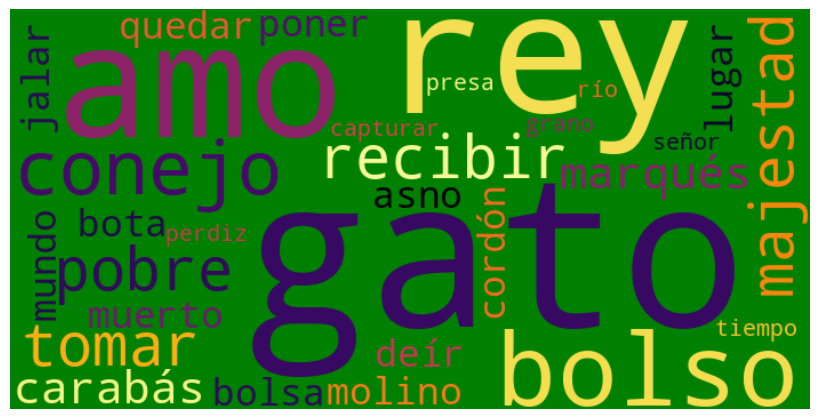

In [ ]:
# Configuramos el tamaño del ploteo
plt.figure(figsize=(8, 6)) # Tamaño de la figura
plt.imshow(wordcloud_generator, interpolation='bilinear') # Muestra la imagen con filtro
plt.axis("off") # Para no mostrar los ejes X e Y
plt.tight_layout(pad=0) # Ajustar para que no haya bordes extra
plt.show() # Muestra el grafico creado

Conformando una representación visual de las palabras más frecuentes del fragmento del cuento.